# Day 0: Imports and Utility Functions

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import re
import numpy as np
import random
import string
import collections, itertools
from collections import Counter, defaultdict, namedtuple, deque, OrderedDict
from functools   import lru_cache, reduce
from statistics  import mean, median, mode, stdev, variance
from itertools   import (permutations, combinations, groupby, cycle, chain, product, zip_longest, takewhile, dropwhile, count as count_from)
from heapq       import heappush, heappop, heapify
from operator    import iand, ior, ilshift, irshift
from bisect      import bisect_left, bisect_right

# Day 1: Chronal Calibration

In [2]:
cnt = 0
with open('inputs/day1.txt') as f:
    for line in f:
        cnt += int(line.strip())
print(cnt)

533


In [3]:
cnt = 0
visited = {0}
with open('inputs/day1.txt') as f:
    for line in cycle(f):
        cnt += int(line.strip())
        if cnt in visited:
            print(cnt)
            break
        else:
            visited.add(cnt)

73272


# Day 2: Inventory Management System

In [4]:
twices = threes = 0
with open('inputs/day2.txt') as f:
    lines = f.readlines()
    twices = sum(any(line.count(ch) == 2 for ch in string.ascii_lowercase) for line in lines)
    threes = sum(any(line.count(ch) == 3 for ch in string.ascii_lowercase) for line in lines)
    pairs = [(line1, line2) for line1, line2 in combinations(lines, 2) if sum(ch1 != ch2 for ch1, ch2 in zip(line1, line2)) == 1]
    line1, line2 = pairs[0]
    print(''.join([ch1 for ch1, ch2 in zip(line1, line2) if ch1 == ch2]))
print(twices * threes)

fvstwblgqkhpuixdrnevmaycd

8715


# Day 3: No Matter How You Slice It

In [5]:
rects = []
with open('inputs/day3.txt') as f:
    #1 @ 335,861: 14x10
    for line in f:
        _, _, a, b = line.split()
        left, top = tuple(map(int, a[:-1].split(',')))
        w, h = tuple(map(int, b.split('x')))
        rects.append((top, left, top + h, left + w))

In [6]:
print(rects[0])

(861, 335, 871, 349)


In [7]:
counter = Counter()
for x1, y1, x2, y2 in rects:
    for x in range(x1, x2):
        for y in range(y1, y2):
            counter[x, y] += 1
print(sum(value > 1 for value in counter.values()))

103806


In [8]:
for i, (a, b, c, d) in enumerate(rects, 1):
    for j, (aa, bb, cc, dd) in enumerate(rects, 1):
        if i == j: continue
        if not (cc <= a or c <= aa or dd <= b or d <= bb):
            break
    else:
        print(i)

625


# Day 4: Repose Record

In [9]:
sleeps = defaultdict(Counter) # Guard ID to --> counter
GuardID = None 
low = 0
with open('inputs/day4.txt') as f:
    for line in sorted(f):
        time = line[12:17]
        h, m = time.split(':')
        h, m = int(h), int(m)
        content = line[18:].strip()
        if content.startswith('Guard'):
            _, GuardID, *_ = content.split()
        elif content == 'falls asleep':
            low = m
        else:
            assert(content == 'wakes up')
            for i in range(low, m):
                sleeps[GuardID][i] += 1

In [10]:
name = max(sleeps, key=lambda x : sum(sleeps[x].values()))

In [11]:
max(sleeps[name], key=lambda x : sleeps[name][x]) * int(name[1:])

19025

In [12]:
name = max(sleeps, key=lambda x : max(sleeps[x].values()))

In [13]:
int(name[1:]) * max(sleeps[name], key=lambda x : sleeps[name][x])

23776

# Day 5: Alchemical Reduction

In [14]:
with open('inputs/day5.txt') as f:
    line = f.read()
dis = abs(ord('a') - ord('A'))

In [15]:
# line = "dabAcCaCBAcCcaDA"
def polymer_reaction(line, remove=''):
    line = re.sub('[{}]'.format(remove), '', line)
    stack = []
    for o in map(ord, line):
        if not stack or abs(stack[-1] - o) != dis:
            stack.append(o)
        else:
            stack.pop()
    return len(stack)

In [16]:
L = len(line)
for t in string.ascii_lowercase:
    temp = polymer_reaction(line, remove=t+t.upper())
    if temp < L:
        L = temp
print(L)

5698


# Day 6: Chronal Coordinates

In [17]:
coords = np.loadtxt('inputs/day6.txt', dtype=np.int64, delimiter=', ')
xmin, xmax = coords[:, 0].min(), coords[:, 0].max()
ymin, ymax = coords[:, 1].min(), coords[:, 1].max()
coords[:, 0] -= xmin
coords[:, 1] -= ymin
n = xmax - xmin + 1
m = ymax - ymin + 1
grid = [['.'] * n for _ in range(m)]
queue = collections.deque()
for idx, (y, x) in enumerate(coords):
    grid[x][y] = (idx, 0)
    queue.append((x, y, idx, 0))
while queue:
    size = len(queue)
    for _ in range(size):
        i, j, root, dis = queue.popleft()
        for newi, newj in (i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1):
            if 0 <= newi < m and 0 <= newj < n:
                if grid[newi][newj] == '.':
                    grid[newi][newj] = (root, dis + 1)
                    queue.append((newi, newj, root, dis + 1))
                else:
                    parent, cur_dis = grid[newi][newj]
                    if cur_dis == dis + 1 and root != parent:
                        grid[newi][newj] = ('#', dis + 1)
                    elif cur_dis > dis + 1:
                        grid[newi][newj] = (root, dis + 1)
                        queue.append((newi, newj, root, dis + 1))
def is_valid(i, j, m, n):
    return i > 0 and i < m - 1 and j > 0 and j < n - 1
counter = defaultdict(list)
for i in range(m):
    for j in range(n):
        root, _ = grid[i][j]
        counter[root].append((i, j))
max(len(counter[x]) for x in counter if all(is_valid(i, j, m, n) for i, j in counter[x]))

3660

In [18]:
coords = np.loadtxt('inputs/day6.txt', dtype=np.int64, delimiter=', ')
xmin, xmax = coords[:, 0].min(), coords[:, 0].max()
ymin, ymax = coords[:, 1].min(), coords[:, 1].max()
coords[:, 0] -= xmin
coords[:, 1] -= ymin
n = xmax - xmin + 1
m = ymax - ymin + 1

In [19]:
print(m, n)

299 299


In [20]:
cnt = 0
for i in range(m):
    for j in range(n):
        if sum(abs(x - i) + abs(y - j) for x, y in coords) <= 10000:
            cnt += 1
print(cnt)

35928


# Day 7: The Sum of Its Parts

In [21]:
sucs = defaultdict(set)
pres = defaultdict(set)
nodes = set()
with open('inputs/day7.txt', 'r') as f:
    for line in f:
        _, start, *_, end, _, _ = line.split()
        nodes.add(start)
        nodes.add(end)
        sucs[start].add(end)
        pres[end].add(start)
frees = nodes - pres.keys()
pq = list(frees)
heapify(pq)
ans = ''
while pq:
    node = heappop(pq)
    ans += node
    for nei in sucs[node]:
        if len(pres[nei]) == 1:
            pres.pop(nei)
            heappush(pq, nei)
        elif len(pres[nei]) > 1:
            pres[nei].remove(node)
print(ans)

BETUFNVADWGPLRJOHMXKZQCISY


In [22]:
sucs = defaultdict(set)
pres = defaultdict(set)
nodes = set()
with open('inputs/day7.txt', 'r') as f:
    for line in f:
        _, start, *_, end, _, _ = line.split()
        nodes.add(start)
        nodes.add(end)
        sucs[start].add(end)
        pres[end].add(start)
frees = nodes - pres.keys()
pq = list(frees)
frees = list(frees)
heapify(frees)
heapify(pq)
starts = defaultdict(int)
for node in frees:
    starts[node] = 0
ends = defaultdict(int)
works = dict(zip(string.ascii_uppercase, range(61, 87)))
# works = dict(zip(string.ascii_uppercase, range(1, 27)))
workers = [0] * 5 # 2
heapify(workers)
ans = ''
while pq:
    while frees:
        node = heappop(frees)
        worker_t = heappop(workers)
        worker_t = max(worker_t, starts[node])
        ends[node] = worker_t + works[node]
        heappush(workers, worker_t + works[node])
    node = heappop(pq)
    ans += node
    for nei in sucs[node]:
        if len(pres[nei]) == 1:
            pres.pop(nei)
            heappush(pq, nei)
            heappush(frees, nei)
            starts[nei] = max(ends[node], starts.get(nei, 0))
        elif len(pres[nei]) > 1:
            pres[nei].remove(node)
            starts[nei] = max(ends[node], starts.get(nei, 0))
print(max(ends.values()))

848


# Day 8: Memory Maneuver

In [23]:
with open('inputs/day8.txt', 'r') as f:
    items = f.read().split()
# items = "2 3 0 3 10 11 12 1 1 0 1 99 2 1 1 2".split()
data = iter(map(int, items))
def traverse_tree():
    cnt = 0
    nchilds = next(data)
    nmetas = next(data)
    for _ in range(nchilds):
        cnt += traverse_tree()
    for _ in range(nmetas):
        cnt += next(data)
    return cnt
print(traverse_tree())    

48260


In [24]:
with open('inputs/day8.txt', 'r') as f:
    items = f.read().split()
# items = "2 3 0 3 10 11 12 1 1 0 1 99 2 1 1 2".split()
data = iter(map(int, items))
def traverse_tree_new():
    cnt = 0
    nchilds = next(data)
    nmetas = next(data)
    children = []
    for _ in range(nchilds):
        children.append(traverse_tree_new())
    metas = []
    for _ in range(nmetas):
        temp = next(data)
        metas.append(temp)
        cnt += temp
    if nchilds == 0:
        return cnt
    else:
        cnt = 0
        for idx in metas:
            if 0 <= idx - 1 < nchilds:
                cnt += children[idx - 1]
        return cnt
print(traverse_tree_new())   

25981


# Day 9: Marble Mania
476 players; last marble is worth 71431 points

In [25]:
n, m = 476, 71431
players = [[0] for _ in range(n)]
lst = [0]
cur = 0
for idx, player in enumerate(cycle(players), 1):
    if idx % 23 != 0:
        place = (cur + 1) % len(lst) + 1
        lst.insert(place, idx)
        cur = place
    else:
        player[0] += idx
        cur -= 7
        if cur < 0:
            cur += len(lst)
        player[0] += lst[cur]
        old_cur = cur
        if old_cur + 1 == len(lst):
            cur = 0
        else:
            cur = old_cur
        del lst[old_cur]
    if idx == m:
        break
print(max(item[0] for item in players))

384205


In [26]:
class Node:
    def __init__(self, val, prev=None, nxt=None):
        self.val = val
        self.prev = prev
        self.next = nxt
n, m = 476, 71431 * 100
players = [[0] for _ in range(n)]
node = Node(0)
node.prev = node
node.next = node
root = node
cur = node
for idx, player in enumerate(cycle(players), 1):
    if idx % 23 != 0:
        cur = cur.next
        node = Node(idx)
        node.next = cur.next
        node.prev = cur
        cur.next = node
        node.next.prev = node
        cur = node
    else:
        player[0] += idx
        for _ in range(6):
            cur = cur.prev
        player[0] += cur.prev.val
        cur.prev = cur.prev.prev
        cur.prev.next = cur
    if idx == m:
        break
print(max(item[0] for item in players))
# while True:
#     print(root.val, end=' ')
#     root = root.next
#     if root.val == 0:
#         break

3066307353


# Day 10: The Stars Align

In [27]:
points, vs = [], []
with open('inputs/day10.txt', 'r') as f:
    for line in f:
        line = line.strip()
        x, y = re.split(',\s+', line[line.index('<') + 1: line.index('>')])
        vx, vy = re.split(',\s+', line[line.rindex('<') + 1:-1])
        points.append([int(x), int(y)])
        vs.append([int(vx), int(vy)])

In [28]:
def compute_box(points):
    xmin = points[:, 0].min()
    xmax = points[:, 0].max()
    ymin = points[:, 1].min()
    ymax = points[:, 1].max()
    return ymax - ymin + xmax - xmin
points = np.array(points)
points_copy = points.copy()
vs = np.array(vs)
min_box = compute_box(points) 
step = 0
for i in range(1, 40000):
    points += vs
    b = compute_box(points)
    if b < min_box:
        min_box = b
        step = i

In [29]:
step

10577

In [30]:
points_copy += step * vs

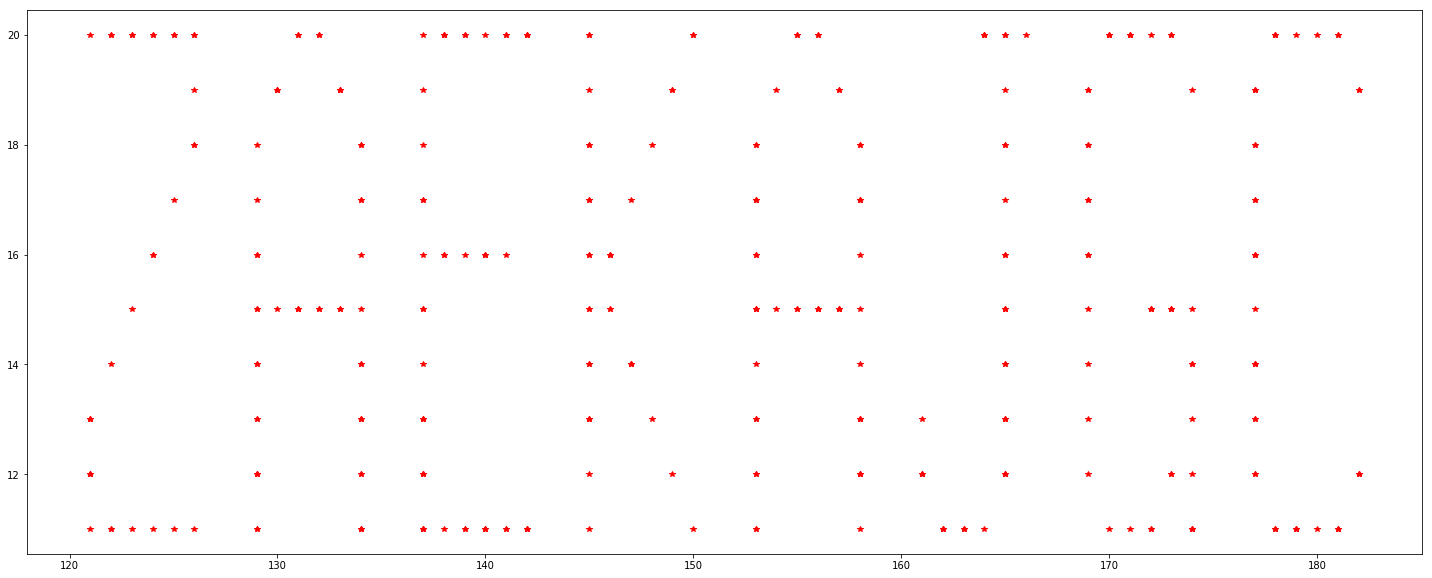

In [31]:
plt.figure(figsize=(25, 10))
plt.plot(points_copy[:, 0], 200 - points_copy[:, 1], 'r*')

# Day 11: Chronal Charge

In [32]:
def fuel_power(x, y, serial=7672):
    rack = x + 10
    power = rack * y + serial
    power *= rack
    ten = (power // 100) % 10
    return ten - 5
assert(fuel_power(122, 79, 57) == -5)
assert(fuel_power(217, 196, 39) == 0)
assert(fuel_power(101, 153, 71) == 4)

In [33]:
from itertools import accumulate

In [34]:
grid = np.zeros((300, 300), dtype=np.int64)

In [35]:
for x in range(1, 301):
    for y in range(1, 301):
        grid[y-1, x-1] = fuel_power(x, y, serial=7672)
acc = np.zeros((301, 301), dtype=np.int64)
for i in range(1, 301):
    for j in range(1, 301):
        acc[i, j] = grid[i - 1, j - 1] + acc[i - 1, j] + acc[i, j - 1] - acc[i - 1, j - 1]


In [36]:
def compute_power(x, y, size):
    # x, y to x + size - 1, y + size - 1
    return acc[x + size, y + size] + acc[x, y] - acc[x, y + size] - acc[x + size, y]

In [37]:
# y, x = max([(x, y) for x in range(300 - 2) for y in range(300 - 2)], key=lambda point: sum(grid[point[0] + i, point[1] + j] for i in range(3) for j in range(3)))
# y, x = max([(x, y) for x in range(300 - 2) for y in range(300 - 2)], key=lambda point: grid[point[0]:point[0] + 3, point[1]:point[1] + 3].sum())
# print(x + 1, y + 1)
size = 3
y, x = max(((x, y) for x in range(300 - size + 1)
                  for y in range(300 - size + 1)),
                  key=lambda point:compute_power(*point, size))
print(x + 1, y + 1)

22 18


In [38]:
max_power = float('-inf')
rx, ry, rsize = None, None, None
for size in range(1, 301):
    powers = [(compute_power(x, y, size), (x, y)) 
              for x in range(300 - size + 1) 
              for y in range(300 - size + 1)]
    power, (x, y) = max(powers)
    if power > max_power:
        rx = y + 1
        ry = x + 1
        rsize = size
        max_power = power
print(rx, ry, rsize)

234 197 14


# Day 12: Subterranean Sustainability

In [39]:
with open('inputs/day12.txt', 'r') as f:
    lines = f.readlines()
state = lines[0][len("initial state: "):].strip()
positions = {i for i, ch in enumerate(state) if ch == '#'}
rules = set()
for line in lines[2:]:
    a, b = line.strip().split(' => ')
    if b == '#':
        rules.add(tuple(a))
positions_back = positions.copy()

In [40]:
def next_gen(rules, positions):
    start, end = min(positions), max(positions)
    ans = set()
    for i in range(start - 3, end + 4):
        five = tuple('#' if (i + di) in positions else '.' for di in range(-2, 3))
        if five in rules:
            ans.add(i)
    return ans

In [41]:
for _ in range(20):
    positions = next_gen(rules,positions)
print(sum(positions))

3120


In [48]:
# positions = positions_back.copy()
# i = 0
# while i < 400:
#     i += 1
#     pre = sum(positions)
#     positions = next_gen(rules, positions)
#     print("{}: {} {}".format(i, sum(positions) - pre, sum(positions)))

In [43]:
print((50_000_000_000 - 101) * 59 + 7557)

2950000001598


# Day 13: Mine Cart Madness

In [44]:
with open('inputs/day13.txt', 'r') as f:
    lines = [line.rstrip('\n') for line in f]

In [45]:
graph = {}
carts = {}
lens = []
d = {'>' : '-', '<' : '-', '^' : '|', 'v' : '|'}
for i, line in enumerate(lines):
    lens.append(len(line))
    for j, ch in enumerate(line):
        graph[i, j] = ch
        if ch in ('^', 'v', '>', '<'):
            carts[i, j] = [ch, 0]

In [46]:
dirs = {'>' : (0, 1), '<' : (0, -1), '^' : (-1, 0), 'v' : (1, 0)}
# also need to think about update ...
# 0, 1, 2 means left, straight, right
lefts = {'>' : '^', '<' : 'v', '^' : '<', 'v' : '>'}
straights = {'>' : '>', '<' : '<', '^' : '^', 'v' : 'v'}
rights = {'>' : 'v', '<' : '^', '^' : '>', 'v' : '<'}
turns = [lefts, straights, rights]
# corners
corners = {'/' : {'^' : '>', '<' : 'v', '>' : '^', 'v' : '<'},
           '\\' : {'>' : 'v', '^' : '<', 'v' : '>', '<' : '^'},
          }
while True:
    temp = {}
    positions = set(carts.keys())
    done = False
    for i, j in sorted(carts):
        positions.remove((i, j))
        ch, t = carts[i, j]
        if graph[i, j] == '+':
            ch = turns[t][ch]
            t += 1
            if t == 3:
                t = 0
        di, dj = dirs[ch]
        newi, newj = i + di, j + dj
        if (newi, newj) in positions:
            print(newi, newj)
            done = True
            break
        if graph[newi, newj] in ('/', '\\'):
            ch = corners[graph[newi, newj]][ch]
        temp[newi, newj] = [ch, t]
        positions.add((newi, newj))
    if done:
        break
    carts = temp

36 136


In [47]:
graph = {}
carts = {}
lens = []
d = {'>' : '-', '<' : '-', '^' : '|', 'v' : '|'}
for i, line in enumerate(lines):
    lens.append(len(line))
    for j, ch in enumerate(line):
        graph[i, j] = ch
        if ch in ('^', 'v', '>', '<'):
            carts[i, j] = [ch, 0]
while True:
    temp = {}
    if len(carts) == 1:
        print(carts)
        break
    positions = set(carts.keys())
    removed = set()
    for i, j in sorted(carts):
        if (i, j) in removed:
            continue
        positions.remove((i, j))
        ch, t = carts[i, j]
        if graph[i, j] == '+':
            ch = turns[t][ch]
            t += 1
            if t == 3:
                t = 0
        di, dj = dirs[ch]
        newi, newj = i + di, j + dj
        if (newi, newj) in positions:
            removed.add((newi, newj))
#             print(newi, newj)
            continue
        if graph[newi, newj] in ('/', '\\'):
            ch = corners[graph[newi, newj]][ch]
        temp[newi, newj] = [ch, t]
        positions.add((newi, newj))
    carts = temp
    for item in removed:
        if item in carts:
            del carts[item]

{(111, 53): ['^', 2]}


# Day 14: Chocolate Charts